<h1>Análisis de sentimiento usando regresión logística</h1>

Se tiene como objetivo de este proyecto crear un modelo de regresión logística para analizar el sentimiento de distintos tweets utilizando un conjunto de datos de tweets relacionados con el presidente de México. 

In [3]:
pip install unidecode

Note: you may need to restart the kernel to use updated packages.


<h2>Importamos librerías que usaremos</h2>

In [43]:
import pandas as pd
import matplotlib as plt
import numpy as np 
import nltk
from os import getcwd
import re
import unidecode

In [44]:
from nltk.corpus import twitter_samples 

from utils import process_tweet, build_freqs

In [45]:
df = pd.read_csv("base_amlo.csv")

In [46]:
df.head(20)

,created_at,id,user id,full_text,localidad,retweet_count,favorite_count,clasification,tidy_text
0,12/10/2020 01:31,1.320000e+18,9.884670e+17,Slim es de los principales beneficiados por AM...,"Xochimilco, Distrito Federal",0,0,1.0,slim principales beneficiados amlo siempre mas...
1,12/10/2020 02:30,1.320000e+18,1.147230e+18,¡ESTO NO LO VISTE DE @lopezobrador_ EN VERDAD...,Aquí! en mi México Querido.,0,0,0.0,viste @lopezobrador_ verdad ll0ro dar mensaje ...
2,19/10/2020 12:08,1.320000e+18,1.102780e+18,▶️ Sigue la conferencia diaria del presidente ...,"Querétaro, Querétaro Arteaga",0,0,2.0,▶️ sigue conferencia diaria presidente lopez o...
3,19/10/2020 12:08,1.320000e+18,2.374583e+09,#EnPortada | Ante represión violenta en Tabasc...,Ciudad de México,0,0,2.0,#enportada represion violenta tabasco amlo: pr...
4,19/10/2020 12:08,1.320000e+18,1.204230e+18,@Vale___Mx @PartidoMorenaMx Por eso de que vot...,NaN,0,0,1.0,@vale___mx @partidomorenamx voto masivo morena...
5,19/10/2020 12:08,1.320000e+18,1.943935e+08,"alergia mañanera, me caes mal",alondra's heart,0,0,3.0,alergia mañanera caes mal
6,19/10/2020 12:08,1.320000e+18,3.005050e+08,El ejército mexicano no volverá a operar con l...,Mexico,0,0,0.0,ejercito mexicano volvera operar impunidad aco...
7,19/10/2020 12:08,1.320000e+18,4.732145e+07,"@JorgeAl18236615 @brozoxmiswebs Ni leer sabes,...",Mexico Distrito Federal,0,0,1.0,@jorgeal18236615 @brozoxmiswebs leer sabes dan...
8,19/10/2020 12:08,1.320000e+18,1.247060e+18,Ya tengo listas las palomitas para ver la maña...,NaN,0,0,0.0,listas palomitas ver mañanera hoy
9,19/10/2020 12:08,1.320000e+18,2.644248e+08,«Andres Manuel López Obrador Presidente de Méx...,"Minsk, Belarus",0,0,1.0,andres manuel lopez obrador presidente mexico ...


In [47]:
df = df.drop(columns = ["tidy_text"])

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7985 entries, 0 to 7984
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   created_at      7985 non-null   object 
 1   id              7985 non-null   float64
 2   user id         7985 non-null   float64
 3   full_text       7985 non-null   object 
 4   localidad       4422 non-null   object 
 5   retweet_count   7985 non-null   int64  
 6   favorite_count  7985 non-null   int64  
 7   clasification   7985 non-null   float64
dtypes: float64(3), int64(2), object(3)
memory usage: 499.2+ KB


<h3> Eliminamos los acentos de las palabras como parte de la limpieza de datos <h3>
    

In [49]:
cols = df.select_dtypes(include=[np.object]).columns
df[cols] = df[cols].apply(lambda x: x.str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8'))
df


/var/folders/7c/0_dkztsn29vd_ngxhnqbg74h0000gn/T/ipykernel_82479/1309476170.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cols = df.select_dtypes(include=[np.object]).columns


,created_at,id,user id,full_text,localidad,retweet_count,favorite_count,clasification
0,12/10/2020 01:31,1.320000e+18,9.884670e+17,Slim es de los principales beneficiados por AM...,"Xochimilco, Distrito Federal",0,0,1.0
1,12/10/2020 02:30,1.320000e+18,1.147230e+18,ESTO NO LO VISTE DE @lopezobrador_ EN VERDAD ...,Aqui! en mi Mexico Querido.,0,0,0.0
2,19/10/2020 12:08,1.320000e+18,1.102780e+18,Sigue la conferencia diaria del presidente Lo...,"Queretaro, Queretaro Arteaga",0,0,2.0
3,19/10/2020 12:08,1.320000e+18,2.374583e+09,#EnPortada | Ante represion violenta en Tabasc...,Ciudad de Mexico,0,0,2.0
4,19/10/2020 12:08,1.320000e+18,1.204230e+18,@Vale___Mx @PartidoMorenaMx Por eso de que vot...,NaN,0,0,1.0
...,...,...,...,...,...,...,...,...
7980,2020-12-01 06:35:28,1.333661e+18,1.145088e+18,@marianagc Que raro que no aparezca la red Aml...,NaN,0,0,1.0
7981,2020-12-01 06:35:17,1.333661e+18,2.773929e+09,Diario Epoca._ El Presidente Lopez Obrador est...,NaN,0,0,1.0
7982,2020-12-01 06:35:14,1.333661e+18,4.650772e+07,@Angelica_MoraP No son necesario. Solamente fo...,"Ciudad de Mexico, D. F.",0,1,1.0
7983,2020-12-01 06:35:11,1.333661e+18,1.383431e+08,"Se vale llorar, merolica, si votaste por amlo ...",Planeta Tierra,0,0,1.0


<h3> Limpieza del texto </h3>
<ul>
    <li>Eliminamos todos los caracteres que no sean del alfabeto en español.</li>
    <li>Eliminamos las menciones.</li>
    <li>Eliminamos los "hashtags".</li>
    <li>Eliminamos los híper textos.</li> 
    <li>Creamos una nueva columna con el texto ya limpio.</li>
</ul>
  

In [50]:
def limpiaTexto(text):
    # Cambia texto a minusculas
    text = text.lower()
    text = re.sub("([^\x00-\x7F])+"," ",text) #quita caracteres chinos y árabes (también acentos (corregir))
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #quita las @
    text = re.sub(r'#', '', text) #quita los # 
    remplaza_por_espacios_re = re.compile('[\n(){}\[\]\|,;\"\“\”\‘\’\'\«\»!¡?¿_]')
    text = re.sub('(?:(?:https?|ftp):\/\/)?[\w/\-?=%.]+\.[\w/\-?=%.]+','',text) #quita los híper textos
    return text

df['tweets_limpios'] = df['full_text'].apply(limpiaTexto)

In [51]:
df.head()

,created_at,id,user id,full_text,localidad,retweet_count,favorite_count,clasification,tweets_limpios
0,12/10/2020 01:31,1.320000e+18,9.884670e+17,Slim es de los principales beneficiados por AM...,"Xochimilco, Distrito Federal",0,0,1.0,slim es de los principales beneficiados por am...
1,12/10/2020 02:30,1.320000e+18,1.147230e+18,ESTO NO LO VISTE DE @lopezobrador_ EN VERDAD ...,Aqui! en mi Mexico Querido.,0,0,0.0,"esto no lo viste de _ en verdad ll0ro!, al da..."
2,19/10/2020 12:08,1.320000e+18,1.102780e+18,Sigue la conferencia diaria del presidente Lo...,"Queretaro, Queretaro Arteaga",0,0,2.0,sigue la conferencia diaria del presidente lo...
3,19/10/2020 12:08,1.320000e+18,2.374583e+09,#EnPortada | Ante represion violenta en Tabasc...,Ciudad de Mexico,0,0,2.0,enportada | ante represion violenta en tabasco...
4,19/10/2020 12:08,1.320000e+18,1.204230e+18,@Vale___Mx @PartidoMorenaMx Por eso de que vot...,NaN,0,0,1.0,"___mx por eso de que voto masivo a morena, la..."


<h3> División de datos de entreamiento y prueba </h3>
<ul>
    <li> Convertimos las columnos que utilizaremos en arreglos de numpy </li>
    <li>Usamos el train_test_split para dividir los datos en entrenamiento y prueba</li>
</ul>

In [52]:
full_text = df['tweets_limpios'].to_numpy() 

In [53]:
clasification = df['clasification'].to_numpy()

In [54]:
type(full_text)

numpy.ndarray

In [55]:
X = full_text
y = clasification

In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [57]:
from nltk.corpus import stopwords 

freqs = build_freqs(X_train, y_train)

# check the output
print("type(freqs) = " + str(type(freqs)))
print("len(freqs) = " + str(len(freqs.keys())))

type(freqs) = <class 'dict'>
len(freqs) = 22377


<h1> Procesado de tweet</h1>
Utilizando la la función de `process_tweet()` de `utils.py` se tokeniza los tweets en palabras individuales y eliminamos los stop words. 

In [118]:
print('Tweet completo: \n', X_train[1])
print('\nTweet procesado: \n', process_tweet(X_train[1]))

Tweet completo: 
 al parecer, la 4t no se cansa de quedar en ridiculo. generalcienfuegos

Tweet procesado: 
 ['parec', '4t', 'cansa', 'quedar', 'ridiculo', 'generalcienfuego']


<h2>Extracción de características</h2>
Se extraen las características de una lista de tweets y se guardan en una matriz. 
La primera característica son el número de palabras positivas en un tweet y la segunda son el 
número de palabras negativas en un tweet. 

In [68]:
def extract_features(tweet, freqs):
  
  
    # Se procesa el tweet
    word_l = process_tweet(tweet)
    
    # 3 elements in the form of a 1 x 3 vector
    x = np.zeros((1, 3)) 
    
    #Se pone el sesgo como 1 
    x[0,0] = 1 
    
    
    # Se recorre por cada palabra en la lista de palabras
    for word in word_l:
        
        # Se incrementa el conteo de palabras para la etiqueta positiva 1
        x[0,1] += freqs.get((word, 1.0), 0)
        
        # Se incrementa el conteo de palabras para la etiqueta negativa 0
        x[0,2] += freqs.get((word, 0.0), 0)
        

    assert(x.shape == (1, 3))
    return x

<h3> Extraemos las caracterísitcas de los tweets para poder entrenar y hacer predicciones</h3>

In [87]:
X_train_extract = np.zeros((len(X_train), 3))
for i in range(len(X_train)):
    X_train_extract[i, :]= extract_features(X_train[i], freqs)
    
X_test_extract =  np.zeros((len(X_test), 3))
for i in range(len(X_test)):
    X_test_extract[i, :]= extract_features(X_test[i], freqs)
    


<h2>Regresión Logistica</h2>
<ul>
    <li>Entrenamos nuestro modelo con la función LogisticRegression con los datos de entramiento extraidos</li>
    <li>sacamos el score de nuestro modelo</li>
    <li>hacemos predicciones</li>
    <li>evaluamos nuestro modelo en los datos de prueba y los visualizamos usando una matriz de confusión</li>
</ul>

In [113]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

log_reg.fit(X_train_extract, y_train)

LogisticRegression()

In [114]:
score_train = log_reg.score(X_train_extract, y_train)

score_train

0.4830809497102262

In [104]:
predicciones = log_reg.predict(X_test_extract)

In [103]:
score_test = log_reg.score(X_test_extract, y_test)

score_test

0.45106221547799696

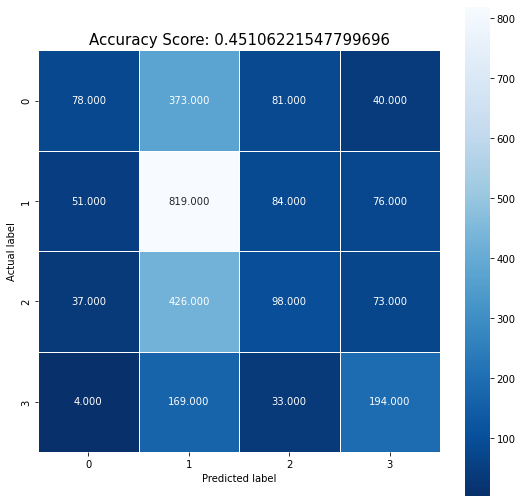

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predicciones)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score_test)
plt.title(all_sample_title, size = 15);

<h2>Conclusiones</h2>
Los scores obtenidos fueron bastantes bajos, probablemente hay que hacer una mejor limpieza de los datos para obtener mejores resultados. También se podría jugar un poco más con el modelo y aplicar distintas técnicas para ajustar los híper parámetros.   